In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [4]:
import pandas as pd
import numpy as np
from dython import nominal
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from synthesis.evaluation import visual, metrics
from quality_evaluation.statistical_metrics import *
from numpy import linalg as LA
import math

# Load the datasets (for subset 1)

In [4]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\df_ori_1_binned.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\df_val_1_binned.csv")

In [5]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [6]:
# Load ms dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\ms_df_syn_1_e{}_v{}.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [7]:
# Load pb dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\pb_df_syn_1_e{}_v{}.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [8]:
## Here the syntehtic and ori datasets are prepared in the following manner:
# - target variable is added
# - variables are added (age) and removed (dates, vital status)
# - missing values are still present

In [9]:
# Put target variable at end for clearer visualization
def target_last_column(df, target):
    df = df[[col for col in df.columns if col != target] + [target]]
    return df

In [11]:
target = '5_yos'
df_ori = target_last_column(df_ori, target)
df_ori_val = target_last_column(df_ori_val, target)

for df_syns in ms_privacy_levels:
    for idx, df_syn in enumerate(df_syns):
        df_syns[idx] = target_last_column(df_syns[idx], target)

for df_syns in pb_privacy_levels:
    for idx, df_syn in enumerate(df_syns):
        df_syns[idx] = target_last_column(df_syns[idx], target)

In [12]:
df_names = ['original data', 'very low', 'low', 'medium', 'high', 'very high']
labels = ['very low', 'low', 'medium', 'high', 'very high']
version = [1,2,3,4,5]

In [20]:
# Balance in datasets
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    i=1
    print("new algorithm")
    for df_syns in privacy_levels:
        j=0
        print("privacy level:", df_names[i])
        for df_syn in df_syns:
            print("version:", version[j])
            print(df_syn['5_yos'].value_counts()/(105695))
            j+=1
        i+=1

new algorithm
privacy level: very low
version: 1
0    0.578145
1    0.421855
Name: 5_yos, dtype: float64
version: 2
0    0.577662
1    0.422338
Name: 5_yos, dtype: float64
version: 3
0    0.576867
1    0.423133
Name: 5_yos, dtype: float64
version: 4
0    0.578381
1    0.421619
Name: 5_yos, dtype: float64
version: 5
0    0.580321
1    0.419679
Name: 5_yos, dtype: float64
privacy level: low
version: 1
0    0.577681
1    0.422319
Name: 5_yos, dtype: float64
version: 2
0    0.580018
1    0.419982
Name: 5_yos, dtype: float64
version: 3
0    0.577804
1    0.422196
Name: 5_yos, dtype: float64
version: 4
0    0.578249
1    0.421751
Name: 5_yos, dtype: float64
version: 5
0    0.578958
1    0.421042
Name: 5_yos, dtype: float64
privacy level: medium
version: 1
0    0.5777
1    0.4223
Name: 5_yos, dtype: float64
version: 2
0    0.5784
1    0.4216
Name: 5_yos, dtype: float64
version: 3
0    0.573688
1    0.426312
Name: 5_yos, dtype: float64
version: 4
0    0.578391
1    0.421609
Name: 5_yos, dtype:

# Jensen-Shannon Distances per feature and per dataset
Jensen-Shannon divergence (extends KL divergence) to calculate a symmetrical score and distance measure of one probability distribution from another.

new algorithm
privacy level: very low
version: 1


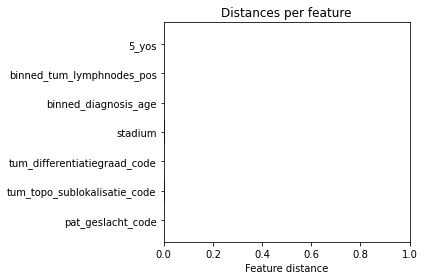

version: 2


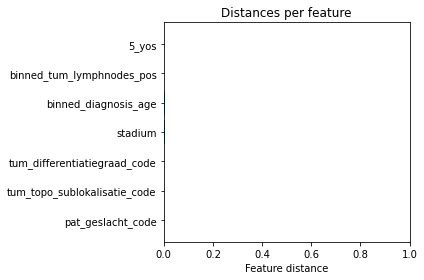

version: 3


version: 4


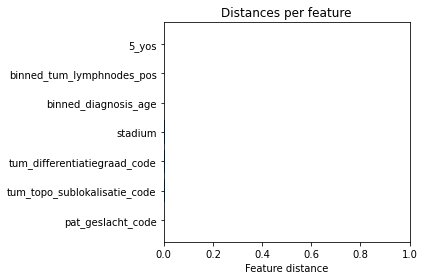

version: 5


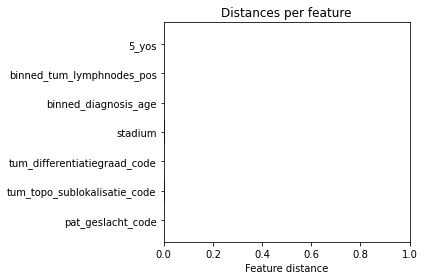

privacy level: low
version: 1


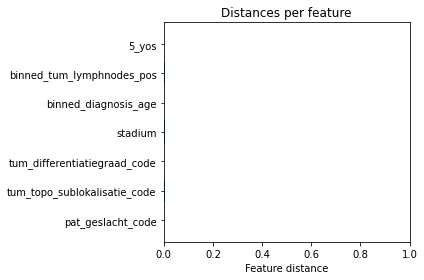

version: 2


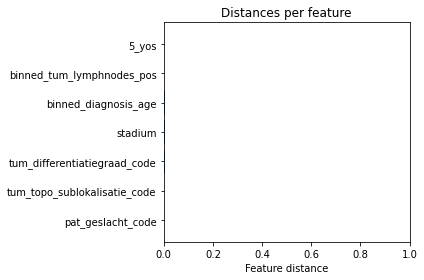

version: 3


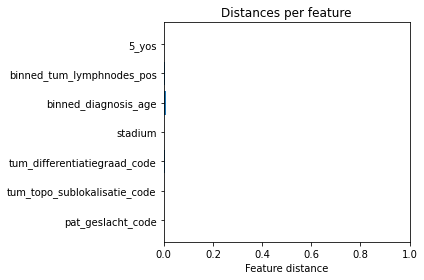

version: 4


version: 5


privacy level: medium
version: 1


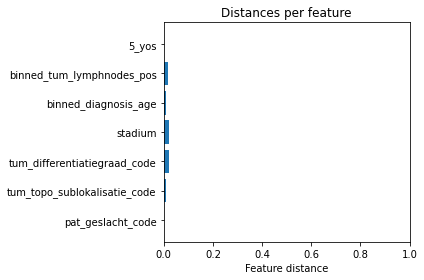

version: 2


version: 3


version: 4


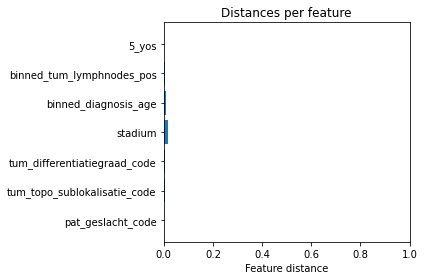

version: 5


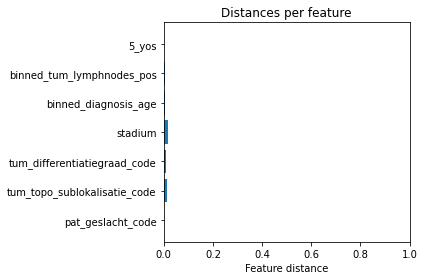

privacy level: high
version: 1


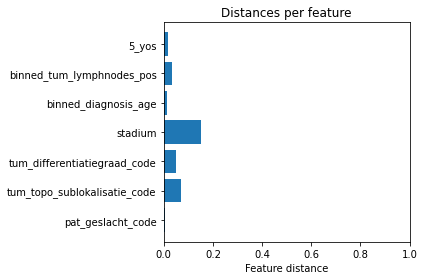

version: 2


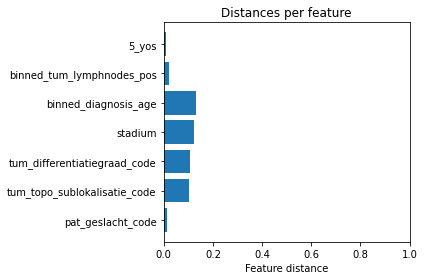

version: 3


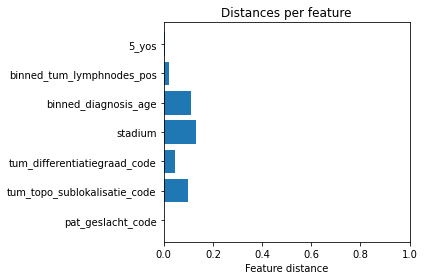

version: 4


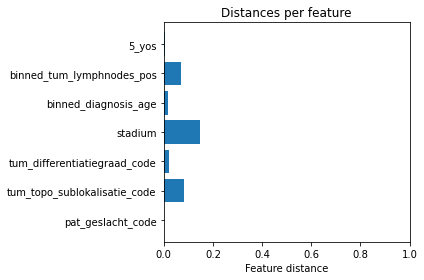

version: 5


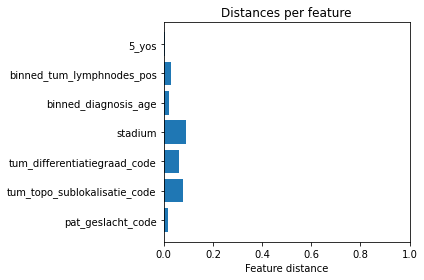

privacy level: very high
version: 1


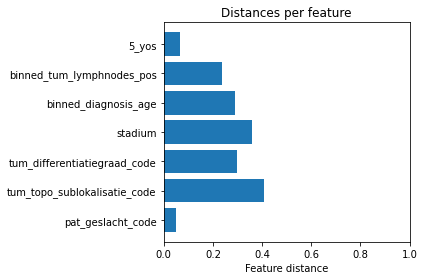

version: 2


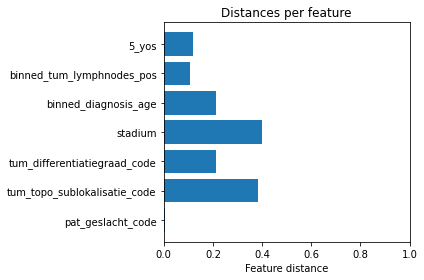

version: 3


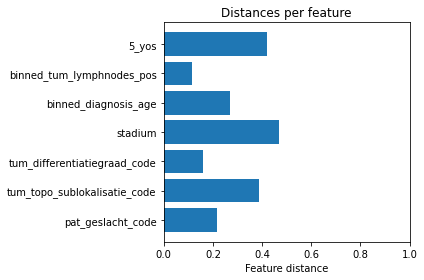

version: 4


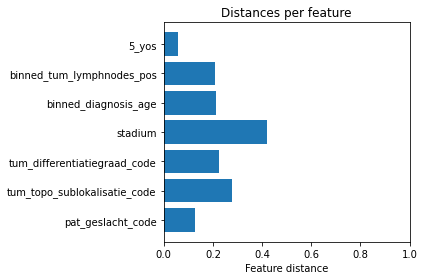

version: 5


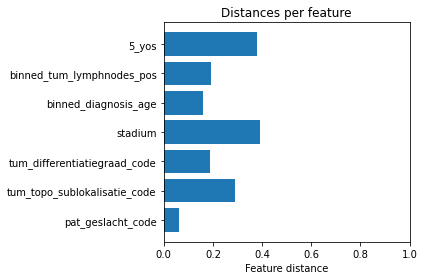

new algorithm
privacy level: very low
version: 1


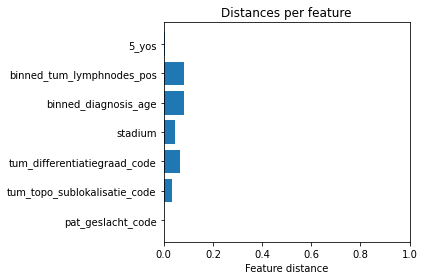

version: 2


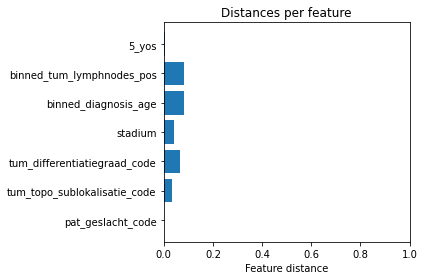

version: 3


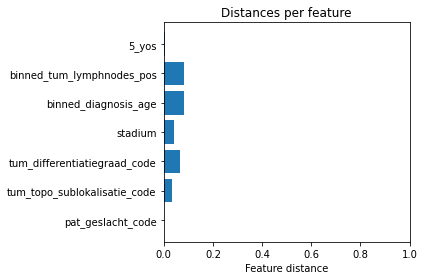

version: 4


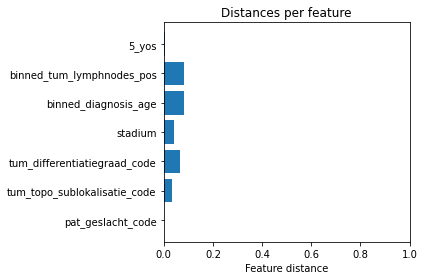

version: 5


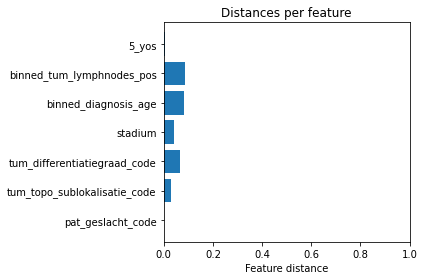

privacy level: low
version: 1


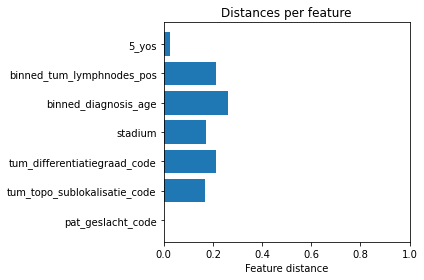

version: 2


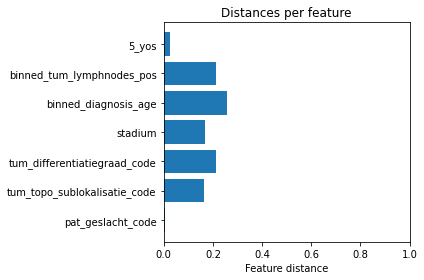

version: 3


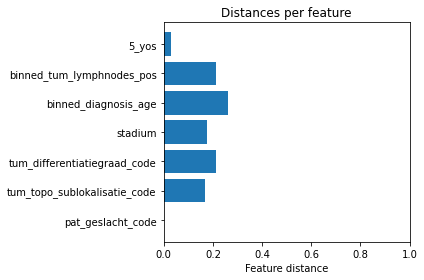

version: 4


version: 5


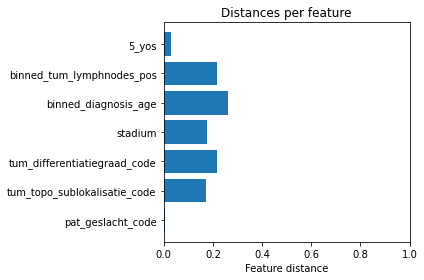

privacy level: medium
version: 1


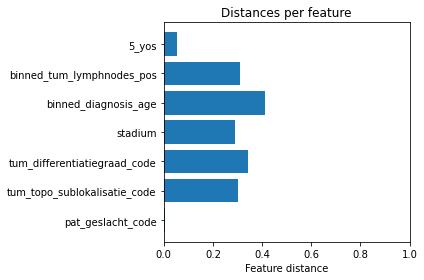

version: 2


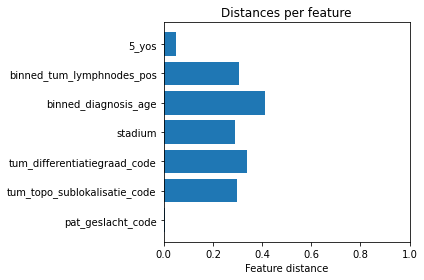

version: 3


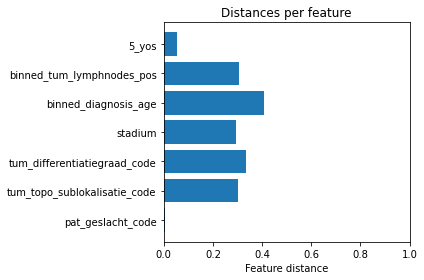

version: 4


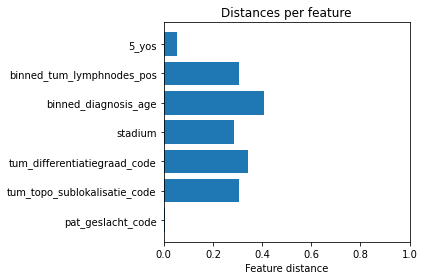

version: 5


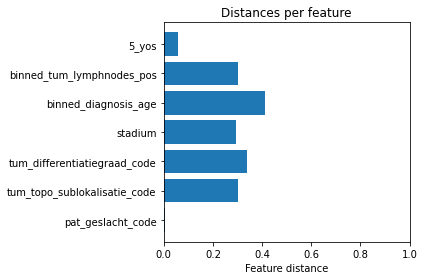

privacy level: high
version: 1


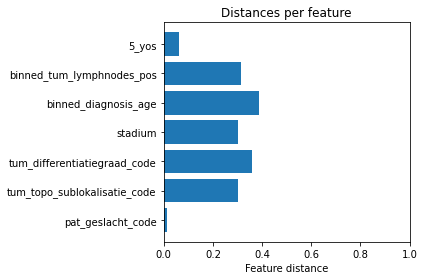

version: 2


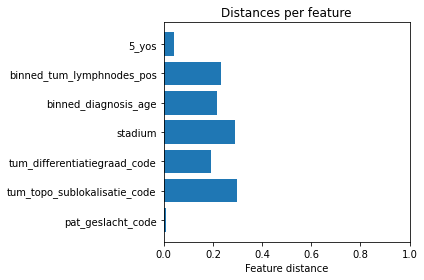

version: 3


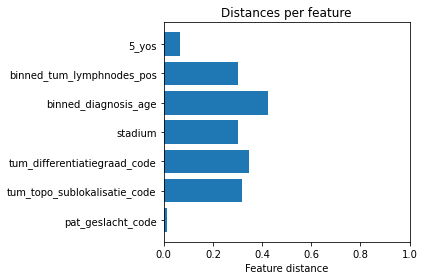

version: 4


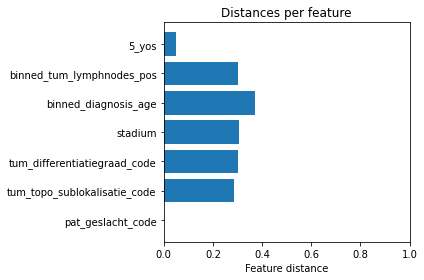

version: 5


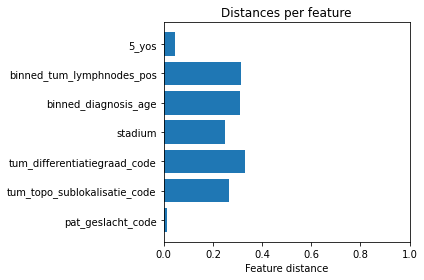

privacy level: very high
version: 1


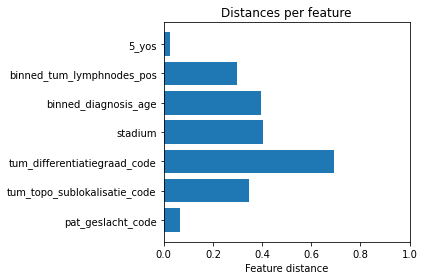

version: 2


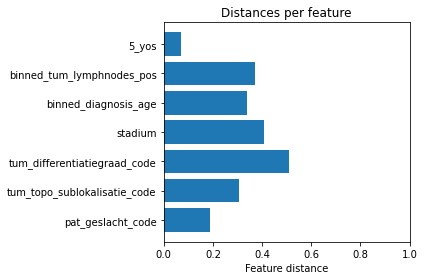

version: 3


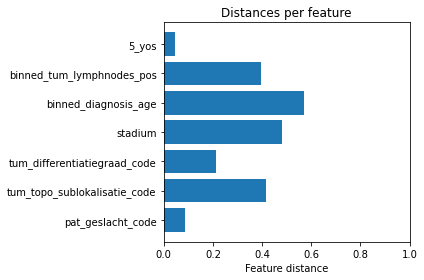

version: 4


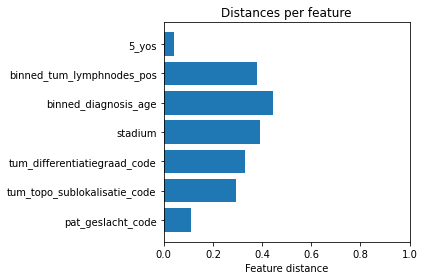

version: 5


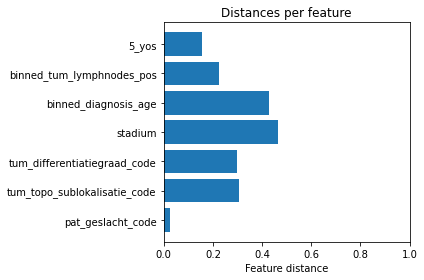

In [11]:
# Print for every version of every privacy level the jensen-shannon distance with the original dataset
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    i=1
    print("new algorithm")
    for df_syns in privacy_levels:
        j=0
        print("privacy level:", df_names[i])
        for df_syn in df_syns:
            print("version:", version[j])
            visual.plot_feature_distances(df_ori, df_syn)
            j+=1
        i+=1

In [12]:
print("Marginal Synthesizer")
plotJSdistance(df_ori, ms_privacy_levels, labels)
print("PrivBayes")
plotJSdistance(df_ori, pb_privacy_levels, labels)

Marginal Synthesizer


PrivBayes


In [23]:
# Store results for combined results at the end
ms_avgJSdistances, ms_stdJSdistances = calculateJSdistance(df_ori, ms_privacy_levels)
pb_avgJSdistances, pb_stdJSdistances = calculateJSdistance(df_ori, pb_privacy_levels)

In [24]:
np.save('ms_mean_js1.npy', ms_avgJSdistances)
np.save('ms_sd_js1.npy', ms_stdJSdistances)

np.save('pb_mean_js1.npy', pb_avgJSdistances)
np.save('pb_sd_js1.npy', pb_stdJSdistances)

## Feature distributions
To visualize the differences in the feature distributions between the datasets

In [11]:
# Show all the five versions for pb privacy level e=0.001
feature_distributions(df_ori, pb_privacy_levels[4], df_names=['original data', 'e0_001 version 1', 'version 2', 'version 3', 'version 4', 'version 5'], cont_vars=["tum_differentiatiegraad_code"])

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', 'pat_geslacht_code', 'tum_topo_sublokalisatie_code', 'binned_diagnosis_age', 'stadium', '5_yos']


In [14]:
# Show all the five versions for ms privacy level e=0.001
feature_distributions(df_ori, ms_privacy_levels[4], df_names=['original data', 'e0_001 version 1', 'version 2', 'version 3', 'version 4', 'version 5'], cont_vars=["tum_differentiatiegraad_code"])

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', 'binned_diagnosis_age', 'pat_geslacht_code', 'stadium', 'tum_topo_sublokalisatie_code', '5_yos']


In [15]:
# Show all the privacy levels ones. For example version 3 of all privacy levels, to have them all included once.
ms_privacy_levels_version3 = []
for i in range(0,5):
    ms_privacy_levels_version3.append(ms_privacy_levels[i][2])

In [16]:
feature_distributions(df_ori, ms_privacy_levels_version3, df_names, cont_vars=["tum_differentiatiegraad_code"])

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', 'binned_diagnosis_age', 'pat_geslacht_code', 'stadium', 'tum_topo_sublokalisatie_code', '5_yos']


## Correlation matrices per dataset and overall distance with original data

In [26]:
# Due to dicretizing more nominal cols
nominal_cols = ['tum_topo_sublokalisatie_code', 'tum_differentiatiegraad_code', 'stadium', 'binned_tum_lymphnodes_pos', "binned_diagnosis_age"]

new algorithm
privacy level: very low
original data


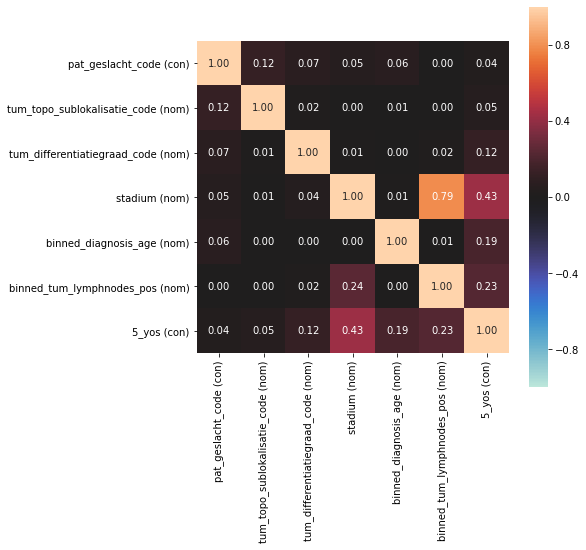

version 1


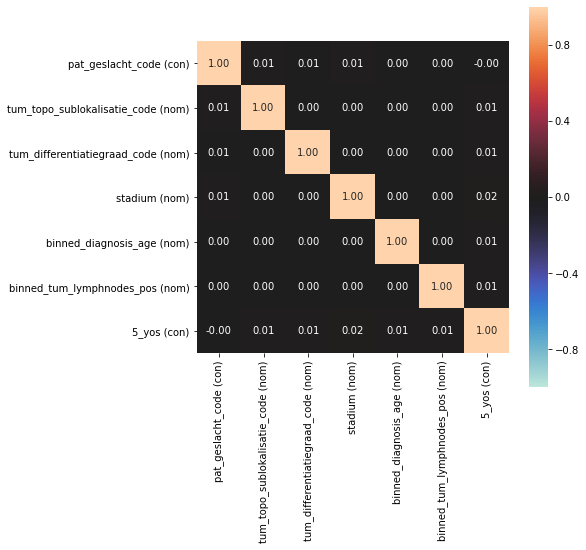

version 2


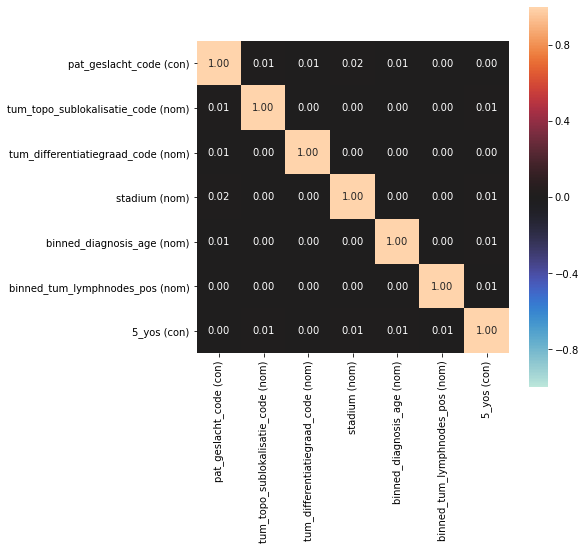

version 3


version 4


version 5


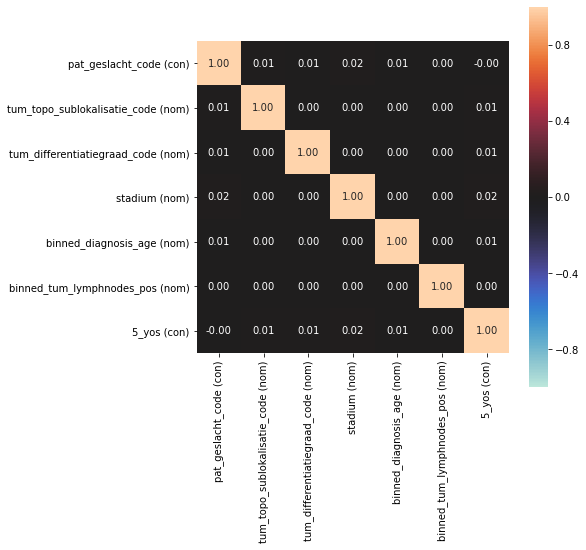

privacy level: low
original data


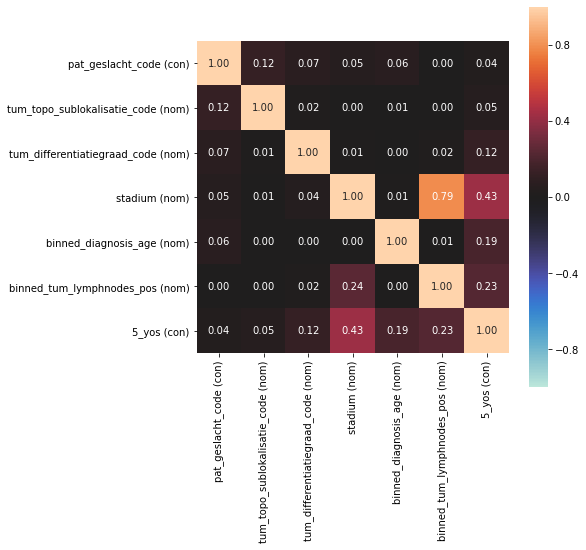

version 1


version 2


version 3


version 4


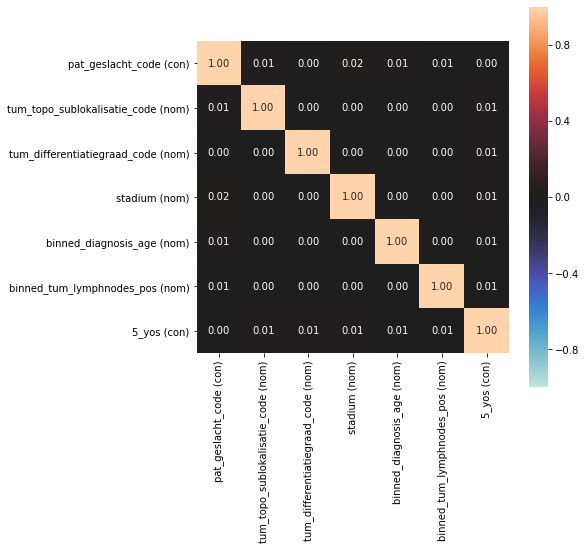

version 5


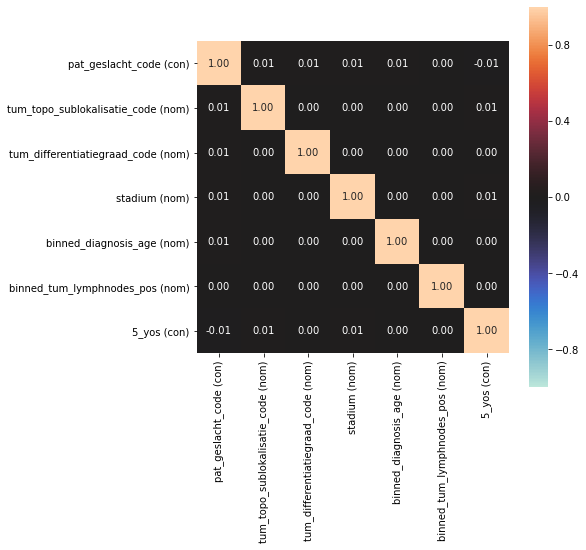

privacy level: medium
original data


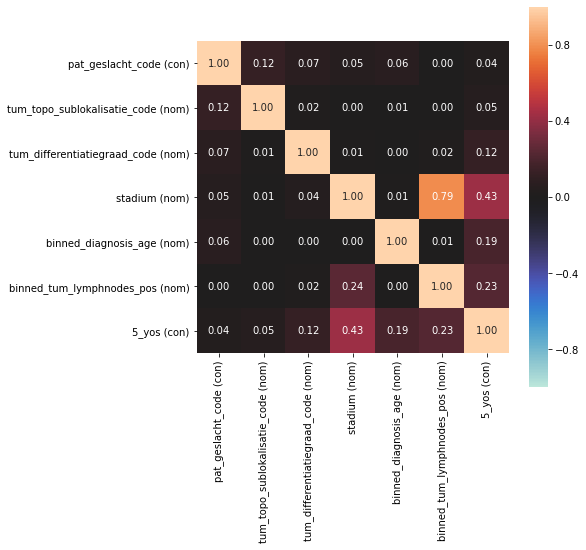

version 1


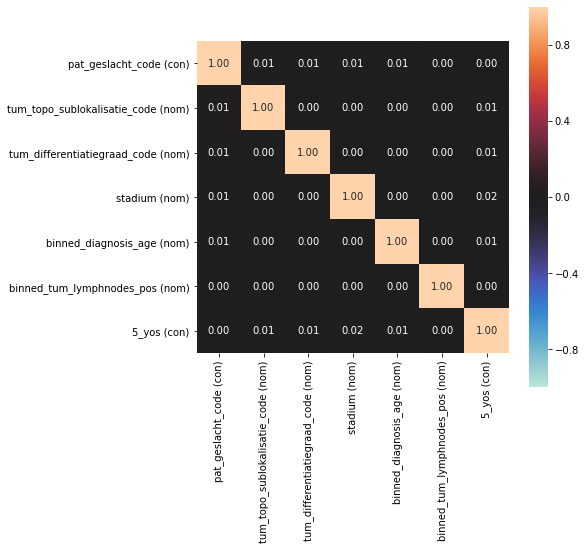

version 2


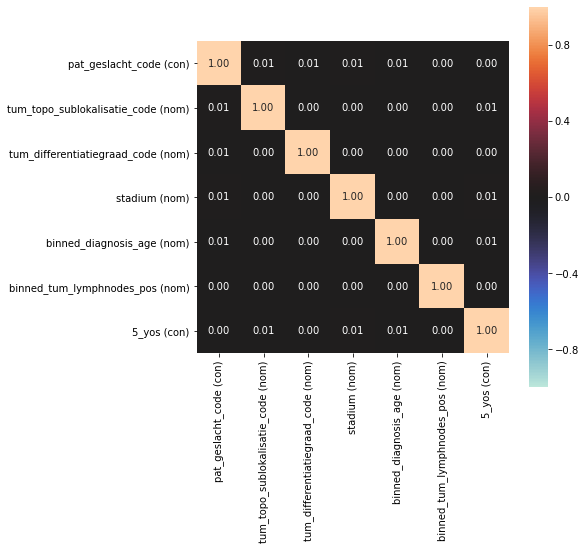

version 3


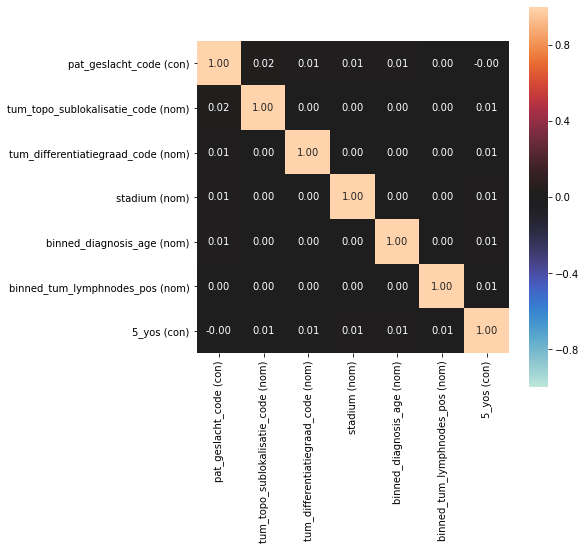

version 4


version 5


privacy level: high
original data


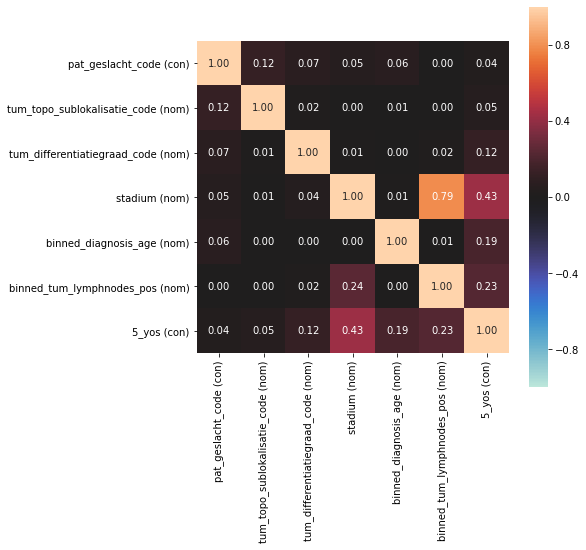

version 1


version 2


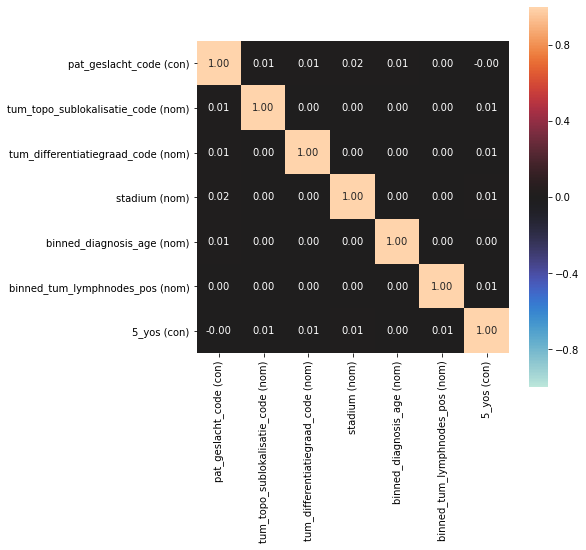

version 3


version 4


version 5


privacy level: very high
original data


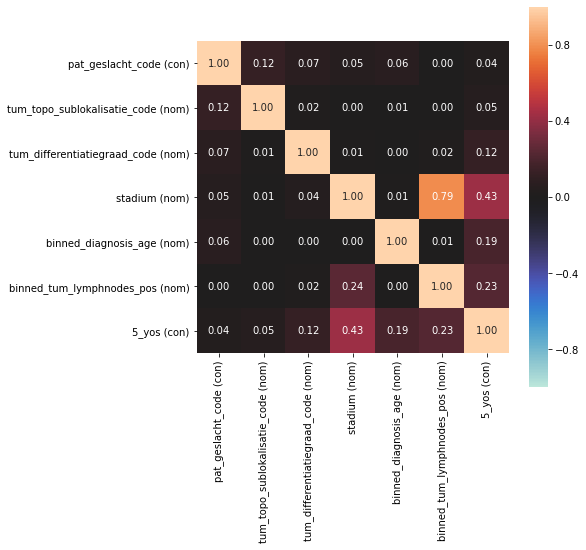

version 1


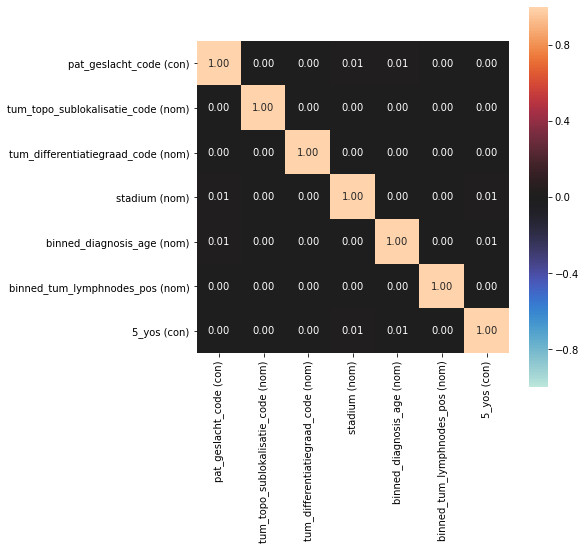

version 2


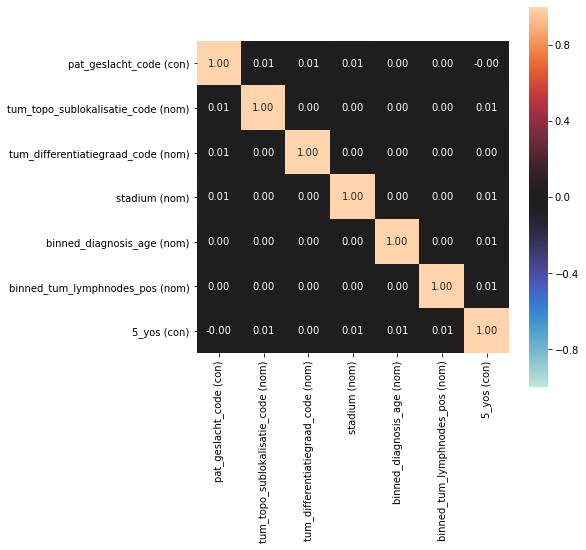

version 3


version 4


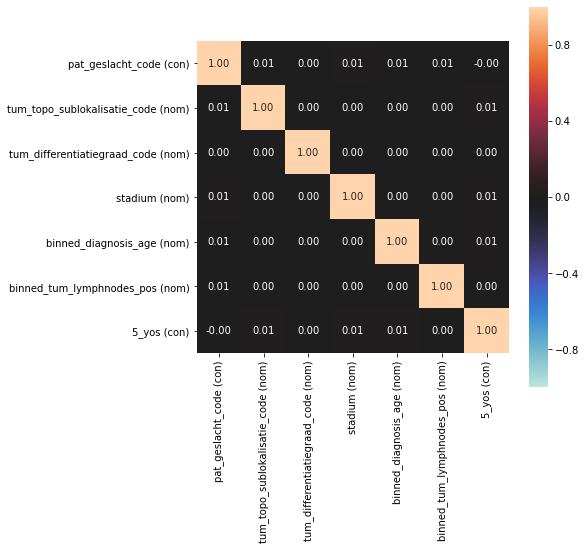

version 5


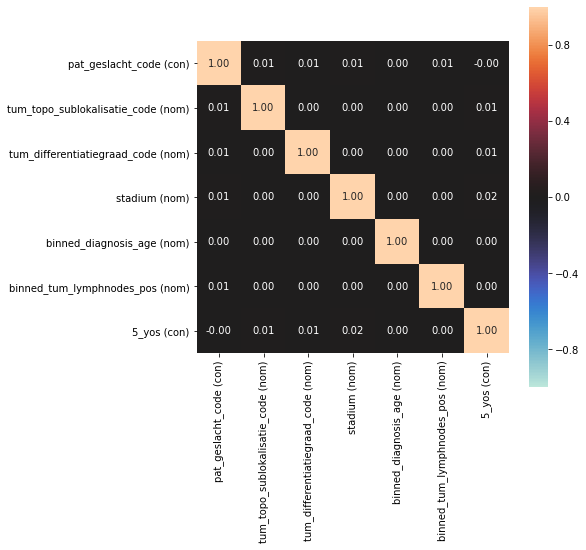

new algorithm
privacy level: very low
original data


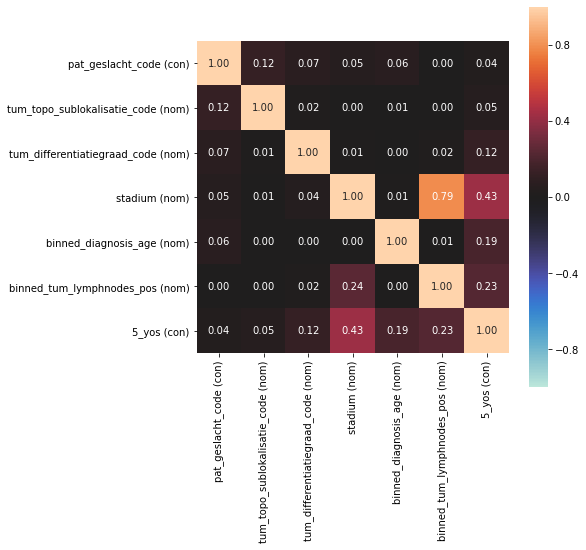

version 1


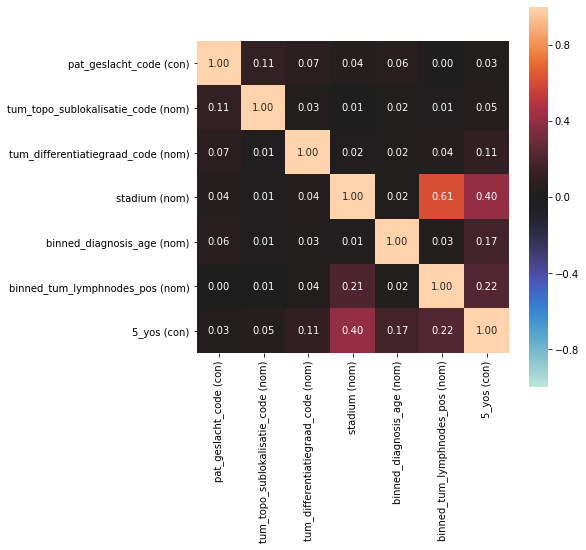

version 2


version 3


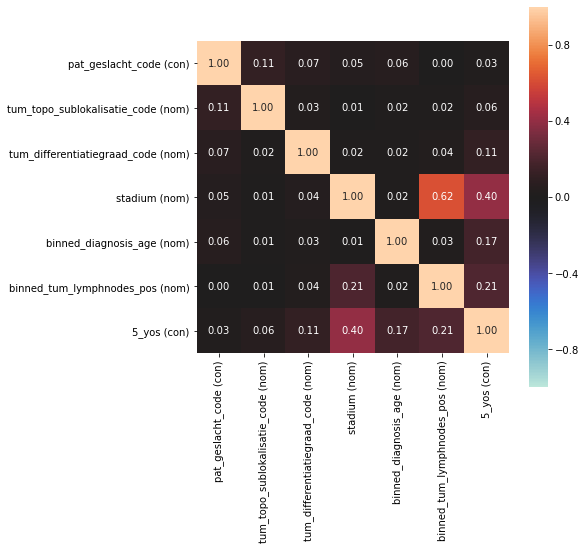

version 4


version 5


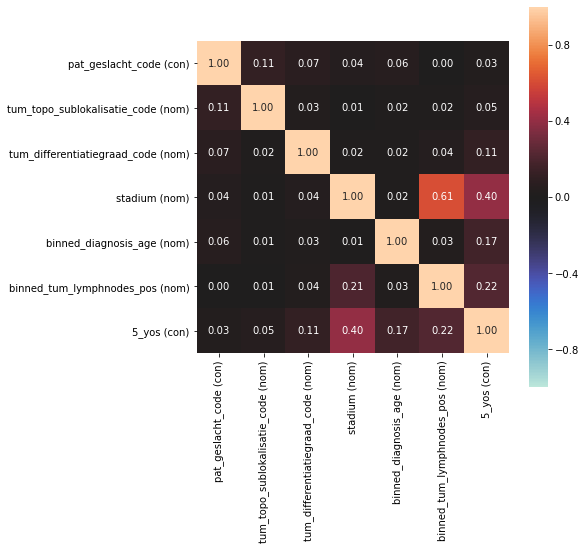

privacy level: low
original data


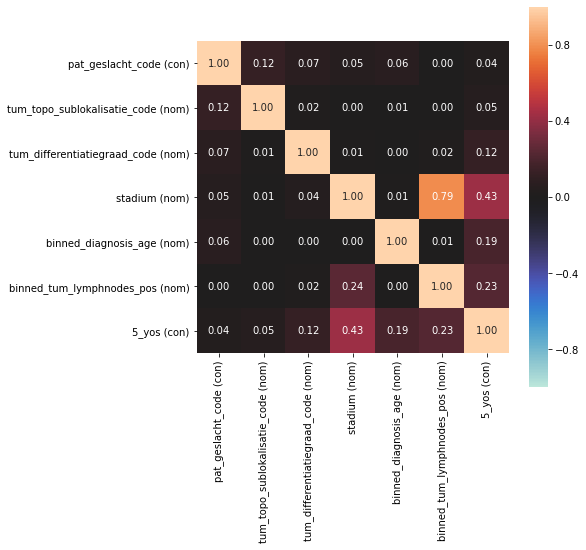

version 1


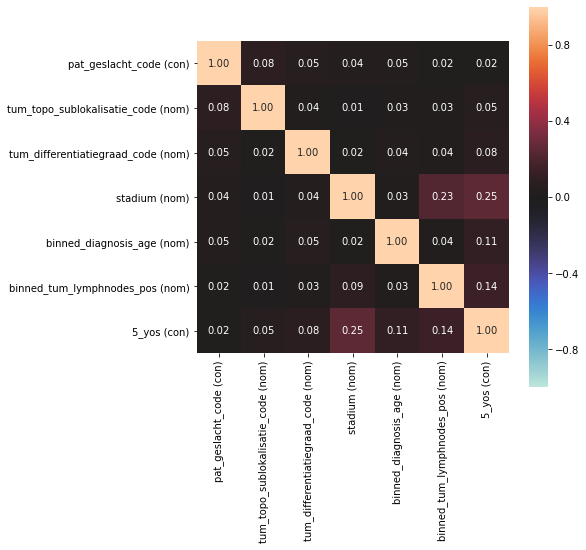

version 2


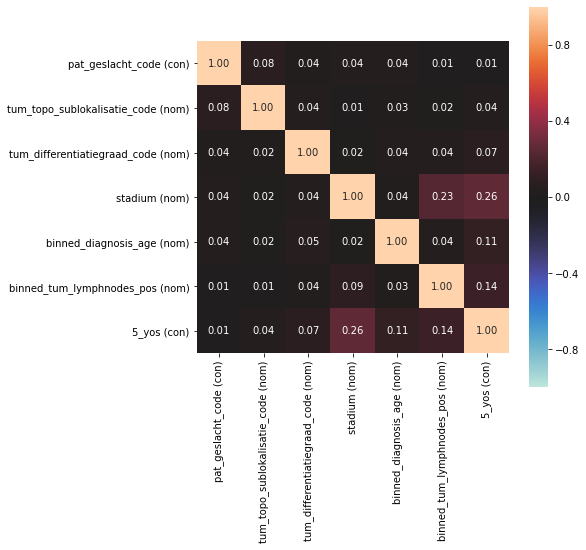

version 3


version 4


version 5


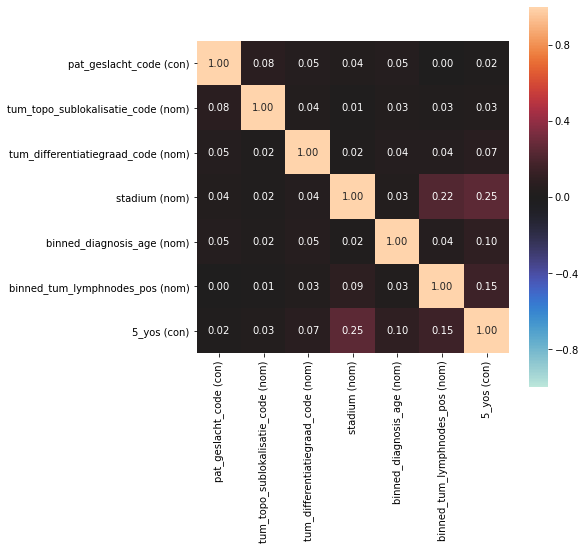

privacy level: medium
original data


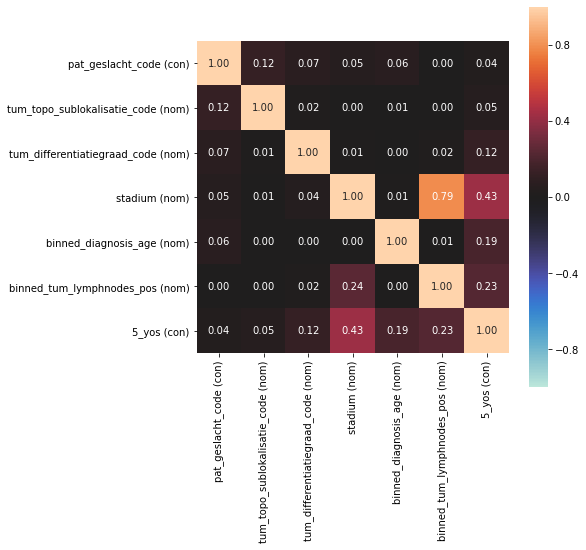

version 1


version 2


version 3


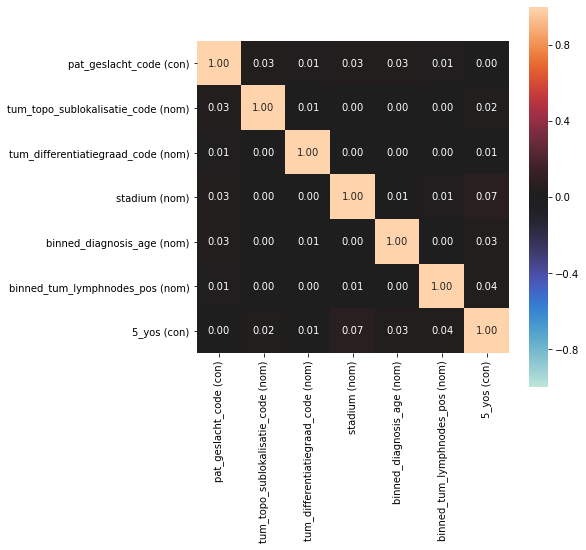

version 4


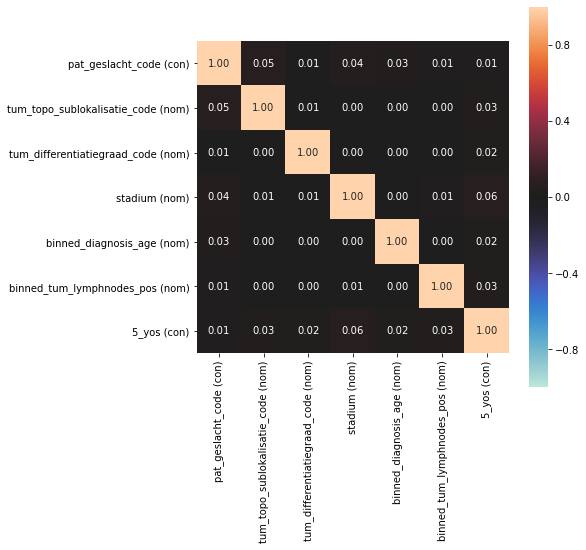

version 5


privacy level: high
original data


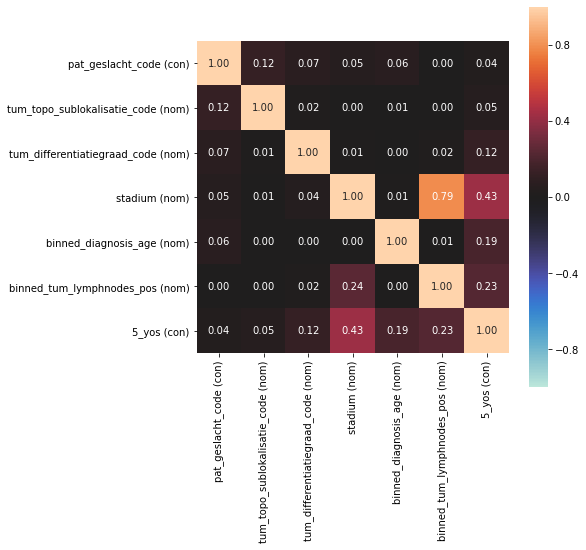

version 1


version 2


version 3


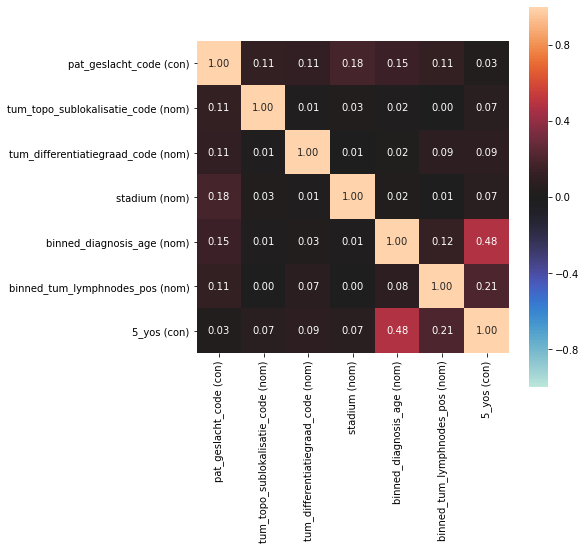

version 4


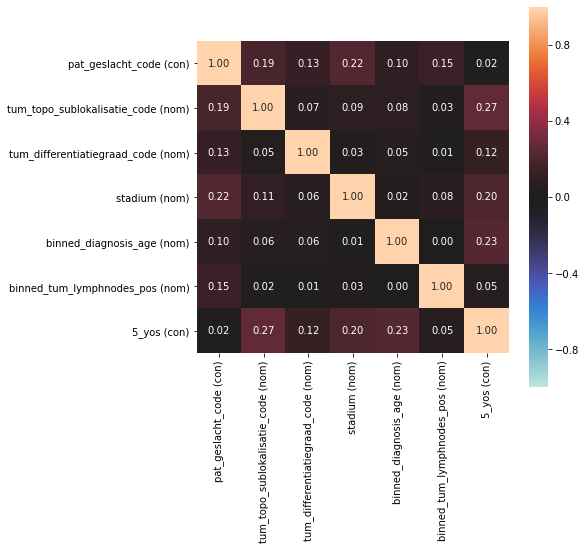

version 5


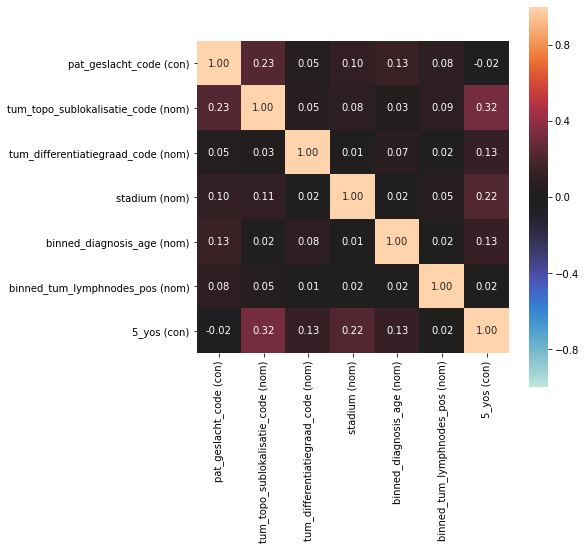

privacy level: very high
original data


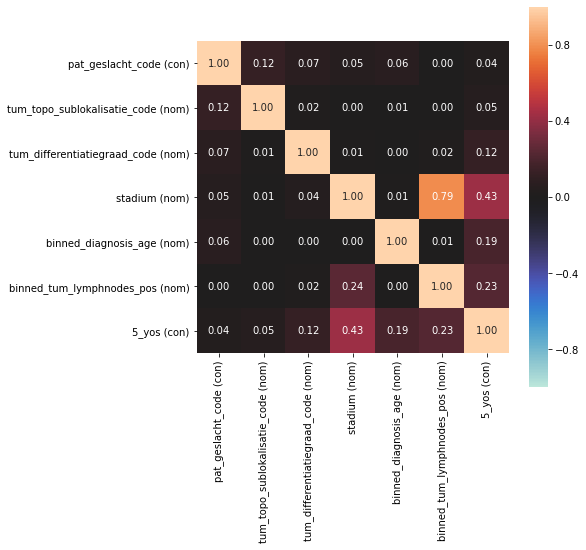

version 1


version 2


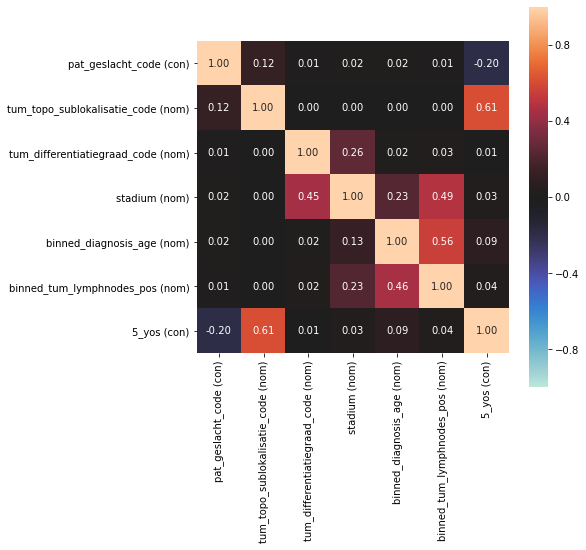

version 3


version 4


version 5


In [18]:
# Show all correlation matrices
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    j=1
    print("new algorithm")
    for df_syns in privacy_levels:
        print("privacy level:", df_names[j])
        correlation_matrices(df_ori=df_ori, df_syns=df_syns, df_names=["original data", "version 1", "version 2", "version 3", "version 4", "version 5"], nominal_cols=nominal_cols)
        j+=1

In [19]:
# Calculate the pair-wise euclidean distance (frobenius norm) for all versions of one privacy level
ms_veryhigh_fro_norm = corr_fro_norm(df_ori, ms_privacy_levels[4], nominal_cols)

In [20]:
# Calculate the pair-wise euclidean distance (frobenius norm) for one version of all privacy levels
ms_privacy_levels_version3 = []
for i in range(0,5):
    ms_privacy_levels_version3.append(ms_privacy_levels[i][2])
    
ms_version3_fro_norm = corr_fro_norm(df_ori, ms_privacy_levels_version3, nominal_cols)

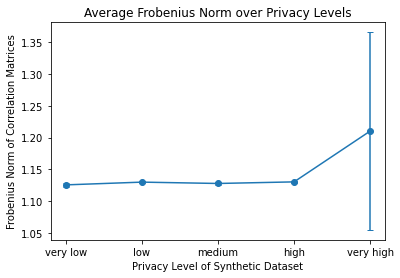

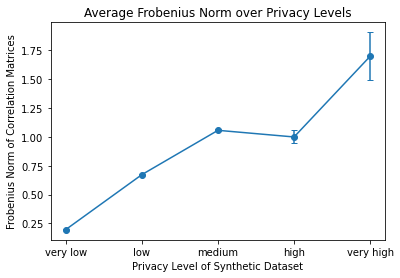

In [21]:
# Plot the correlation distance for both algorithms with multiple versions per privacy level
plotCorrdistance(df_ori, ms_privacy_levels, labels, nominal_cols)
plotCorrdistance(df_ori, pb_privacy_levels, labels, nominal_cols)

In [27]:
# Store for combined results at end
ms_avg_corr, ms_std_corr = avg_corr_fro_norm(df_ori, ms_privacy_levels, nominal_cols)
pb_avg_corr, pb_std_corr = avg_corr_fro_norm(df_ori, pb_privacy_levels, nominal_cols)

In [28]:
np.save('ms_avg_corr1.npy', ms_avg_corr)
np.save('ms_std_corr1.npy', ms_std_corr)

np.save('pb_avg_corr1.npy', pb_avg_corr)
np.save('pb_std_corr1.npy', pb_std_corr)

# Visualize combined results for feature and correlation distances

In [23]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

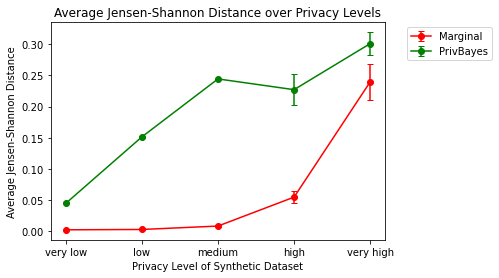

In [24]:
figJS = plotJSdistances_two_algs(ms_avgJSdistances, ms_stdJSdistances, pb_avgJSdistances, pb_stdJSdistances, labels)
figCorr = plotCorrdistances_two_algs(ms_avg_corr, ms_std_corr, pb_avg_corr, pb_std_corr, labels)

figJS.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Result_JS_distance-subset_1.png', bbox_inches='tight', dpi=200)
figCorr.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Result_correlation_distance-subset_1.png', bbox_inches='tight', dpi=200)